In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, precision_recall_curve, auc, roc_auc_score, roc_curve
from scipy.stats import uniform, loguniform

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_X_train.csv', sep=",")
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_Y_train.csv', sep=",").iloc[:, 0]
X_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_X_val.csv', sep=",")
y_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_Y_val.csv', sep=",").iloc[:, 0]
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_X_test.csv', sep=",")
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings_Y_test.csv', sep=",").iloc[:, 0]

In [10]:
svm_model = svm.SVC(max_iter=2000, probability=True, class_weight='balanced', random_state=0)
params = {'C': loguniform(1e-3, 1e2),
          'gamma': loguniform(1e-3, 1e1),
          'kernel': ['linear', 'rbf', 'sigmoid'],
          'coef0': uniform(-1, 2),
          'degree': np.arange(2, 4, 1)}
scoring = {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'roc_auc': 'roc_auc'}
svm_search = RandomizedSearchCV(svm_model,
                                params,
                                scoring=scoring,
                                return_train_score=True,
                                cv=5,
                                refit='precision',
                                n_jobs=-1,
                                random_state=0)
svm_fit = svm_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [11]:
svm_fit_best = svm_search.best_estimator_
svm_fit_best

SVC(C=np.float64(0.23334693280262706), class_weight='balanced',
    coef0=np.float64(-0.6273353133464801), degree=np.int64(2),
    gamma=np.float64(0.06677306766018315), kernel='sigmoid', max_iter=2000,
    probability=True, random_state=0)

In [12]:
y_train_pred = svm_fit_best.predict(X_train)
y_val_pred = svm_fit_best.predict(X_val)
y_test_pred = svm_fit_best.predict(X_test)

=> Training Set Results: 
              precision    recall  f1-score   support

           0       0.84      0.34      0.49     45099
           1       0.44      0.89      0.59     26533

    accuracy                           0.55     71632
   macro avg       0.64      0.62      0.54     71632
weighted avg       0.70      0.55      0.53     71632



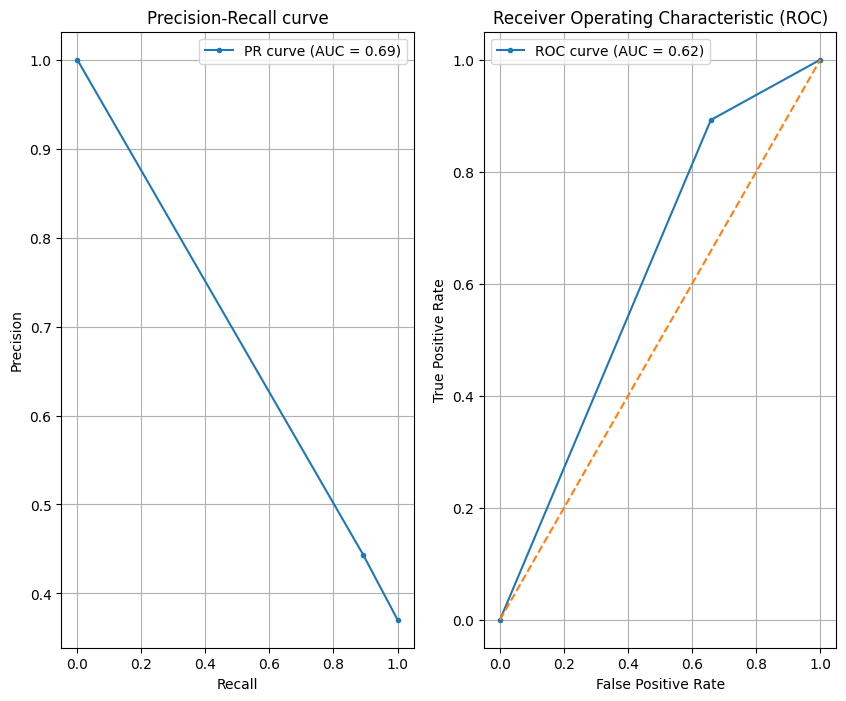

In [13]:
print("=> Training Set Results: ")
print(classification_report(y_train, y_train_pred))
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)
pr_auc_train = auc(recall_train, precision_train)

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(recall_train, precision_train, marker='.', label=f'PR curve (AUC = {pr_auc_train:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve')
plt.legend()
plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr, tpr)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

plt.grid(True)
plt.show()

=> Validation Set Results: 
              precision    recall  f1-score   support

           0       0.85      0.34      0.49     15033
           1       0.44      0.89      0.59      8845

    accuracy                           0.55     23878
   macro avg       0.64      0.62      0.54     23878
weighted avg       0.70      0.55      0.53     23878



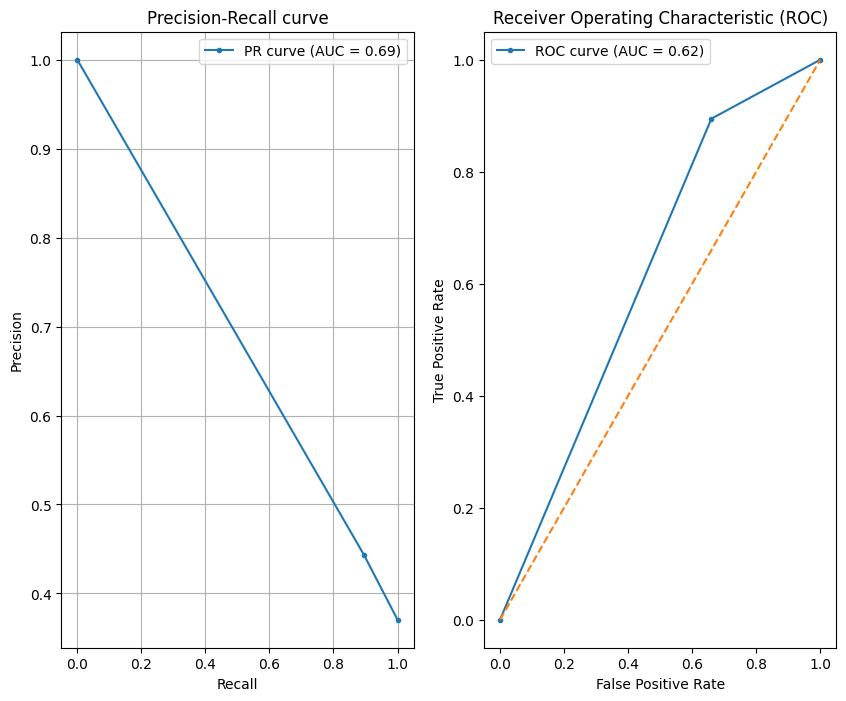

In [14]:
print("=> Validation Set Results: ")
print(classification_report(y_val, y_val_pred))
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_val_pred)
pr_auc_val = auc(recall_val, precision_val)

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(recall_val, precision_val, marker='.', label=f'PR curve (AUC = {pr_auc_val:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve')
plt.legend()
plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
roc_auc_val = auc(fpr, tpr)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

=> Test Set Results: 
              precision    recall  f1-score   support

           0       0.84      0.34      0.49     15033
           1       0.44      0.89      0.59      8845

    accuracy                           0.55     23878
   macro avg       0.64      0.62      0.54     23878
weighted avg       0.70      0.55      0.53     23878



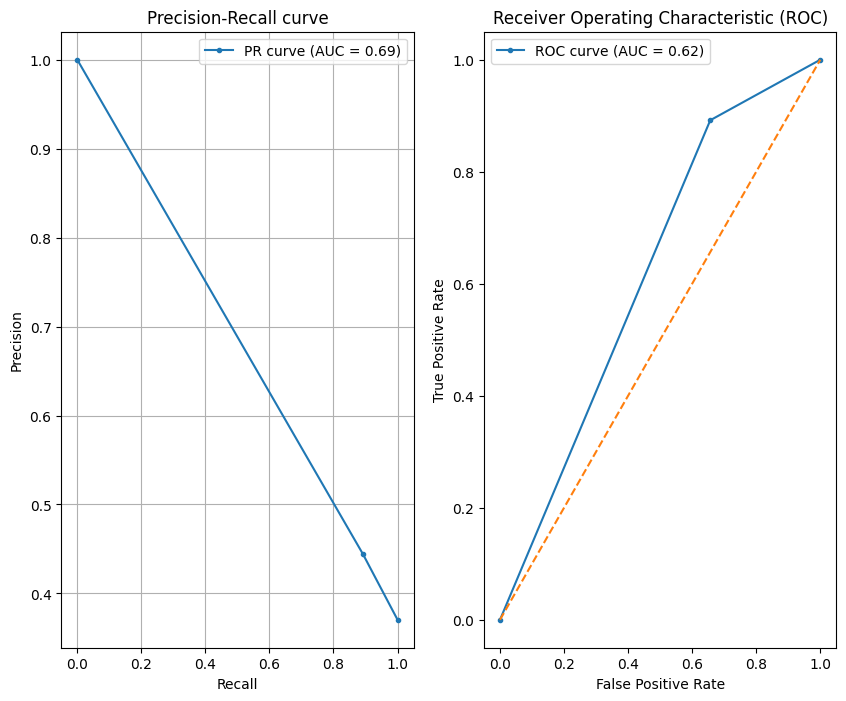

In [15]:
print("=> Test Set Results: ")
print(classification_report(y_test, y_test_pred))
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_pred)
pr_auc_test = auc(recall_test, precision_test)

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(recall_test, precision_test, marker='.', label=f'PR curve (AUC = {pr_auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve')
plt.legend()
plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr, tpr)
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()